# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# load Data

In [2]:
df = pd.read_csv('/content/spotify_history.csv')

# Data exploration

In [3]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [4]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

In [5]:
df.sample(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
49143,7IgBLFklu75pp8Y1vphChS,2018-11-27 22:19:32,android,197704,The Crunge - Remaster,Led Zeppelin,Houses of the Holy,fwdbtn,trackdone,True,False
77097,1cS6quzGhImyJPMiNxfxkA,2020-08-19 14:24:10,android,246000,Dying Breed,The Killers,Dying Breed,clickrow,trackdone,True,False
52497,4C9IP2e5tjrH60hwDVdpOu,2019-04-06 04:05:19,android,585,Lover Of The Light,Mumford & Sons,Babel,fwdbtn,fwdbtn,True,False
61826,6l7ZrfDzuHodT5XfcMmBiX,2019-10-22 17:16:30,android,247413,Roy Rogers - Remastered 2014,Elton John,Goodbye Yellow Brick Road,trackdone,trackdone,True,False
120056,1hgvykolO4kBIEozATmpyj,2022-06-14 20:37:44,android,139466,If I Fell - Remastered 2009,The Beatles,A Hard Day's Night,trackdone,trackdone,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


# Clean Data

In [7]:
missing_values = df.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df

,0
reason_start,143
reason_end,117


<Axes: >

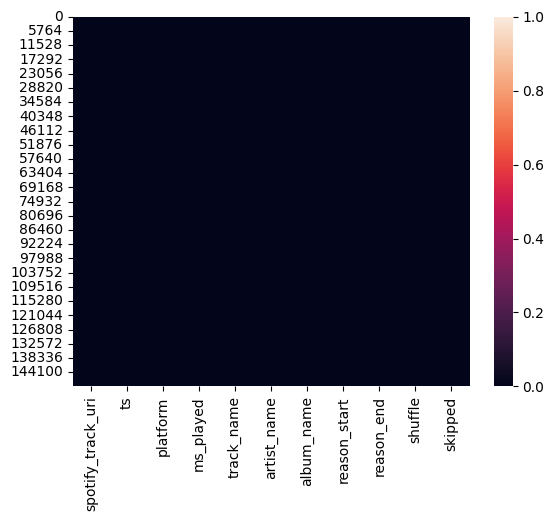

In [8]:
sns.heatmap(df.isnull())

In [9]:
df = df.dropna()

<Axes: >

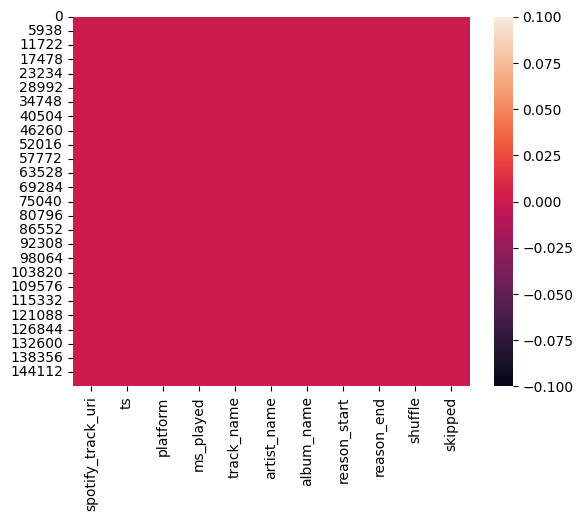

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.duplicated().sum()

np.int64(1185)

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148463 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148463 non-null  object
 1   ts                 148463 non-null  object
 2   platform           148463 non-null  object
 3   ms_played          148463 non-null  int64 
 4   track_name         148463 non-null  object
 5   artist_name        148463 non-null  object
 6   album_name         148463 non-null  object
 7   reason_start       148463 non-null  object
 8   reason_end         148463 non-null  object
 9   shuffle            148463 non-null  bool  
 10  skipped            148463 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


# data analysis

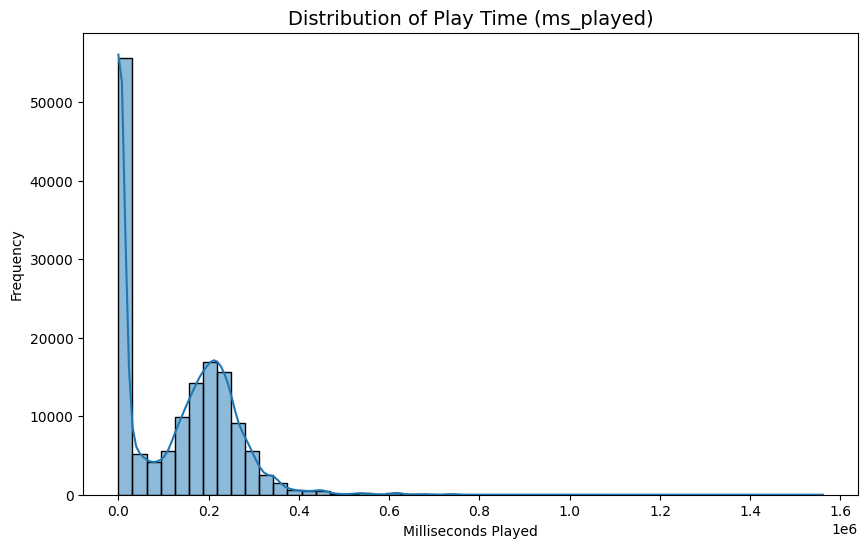

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ms_played'], bins=50, kde=True)
plt.title('Distribution of Play Time (ms_played)', fontsize=14)
plt.xlabel('Milliseconds Played')
plt.ylabel('Frequency')
plt.show()


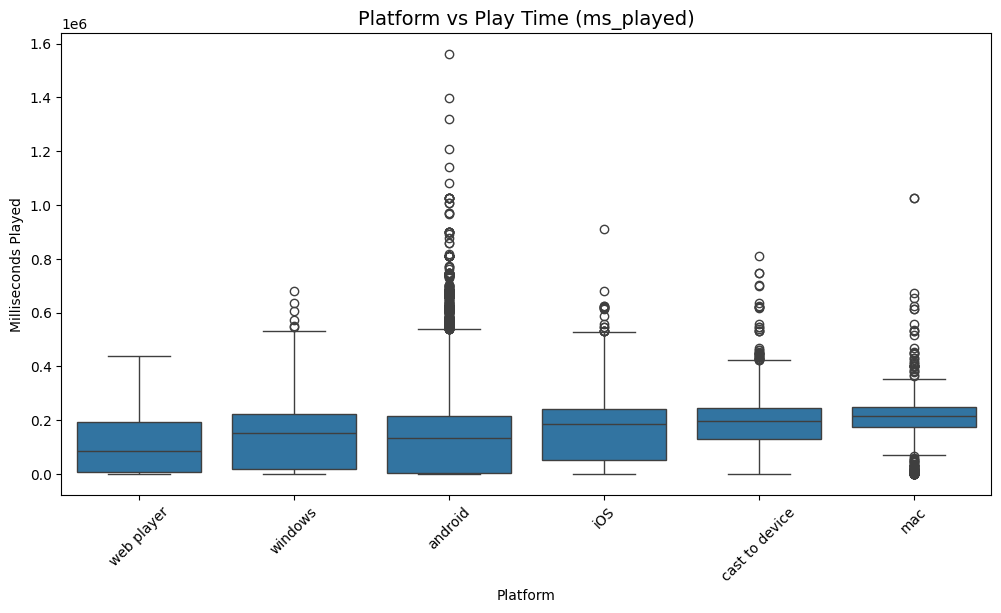

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='ms_played', data=df)
plt.title('Platform vs Play Time (ms_played)', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Milliseconds Played')
plt.xticks(rotation=45)
plt.show()


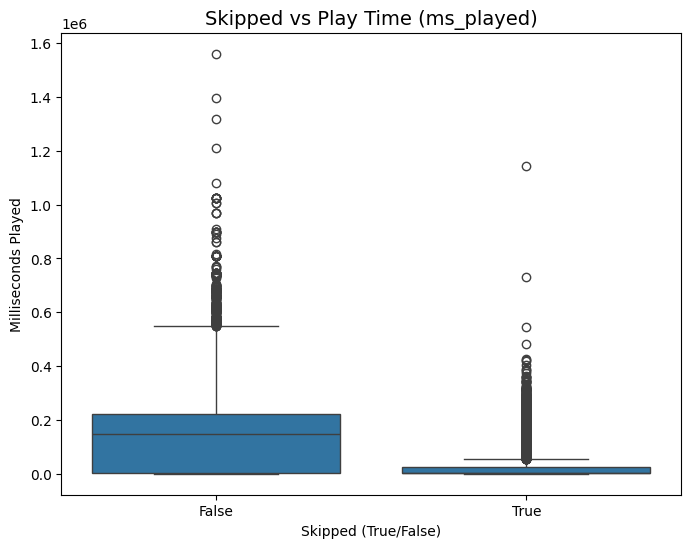

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='skipped', y='ms_played', data=df)
plt.title('Skipped vs Play Time (ms_played)', fontsize=14)
plt.xlabel('Skipped (True/False)')
plt.ylabel('Milliseconds Played')
plt.show()


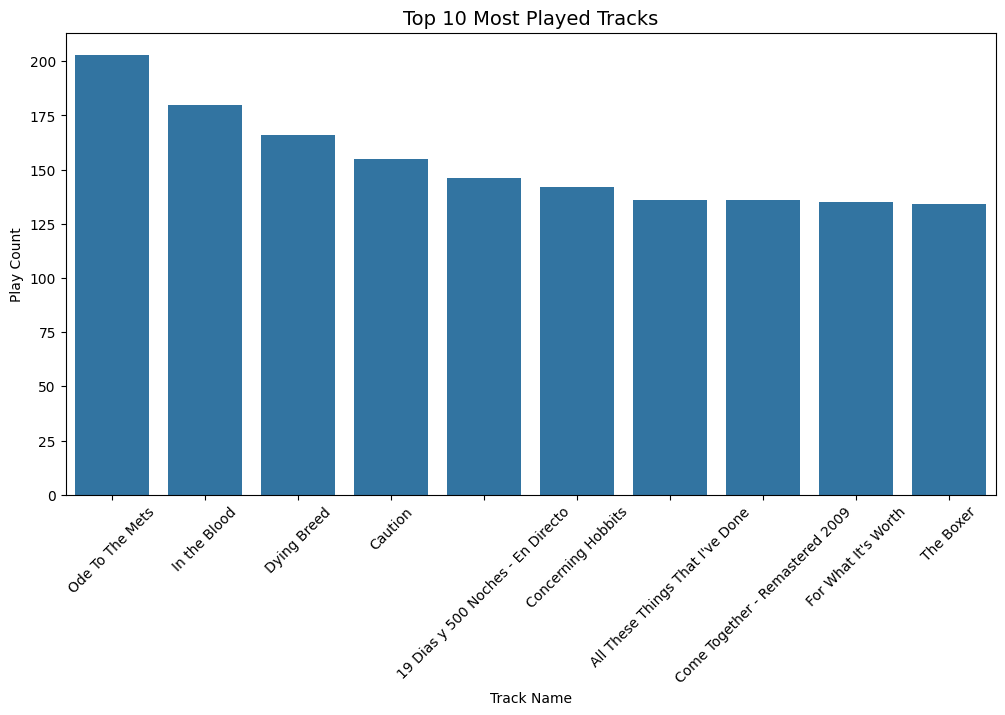

In [18]:
track_counts = df['track_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=track_counts.index, y=track_counts.values)
plt.title('Top 10 Most Played Tracks', fontsize=14)
plt.xlabel('Track Name')
plt.ylabel('Play Count')
plt.xticks(rotation=45)
plt.show()


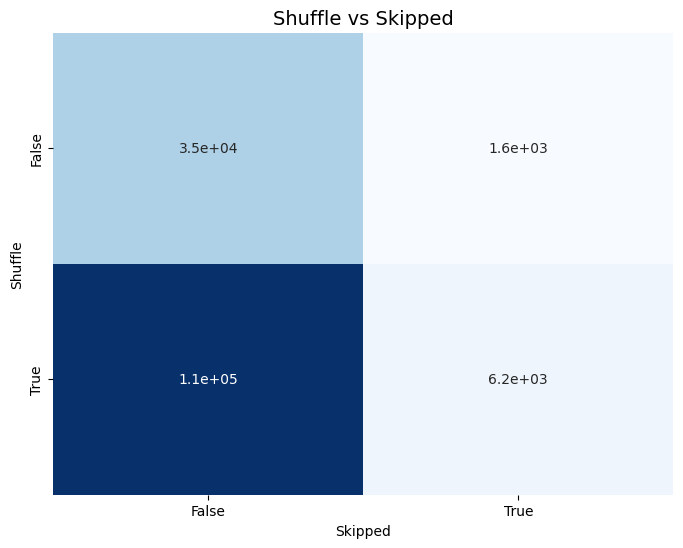

In [19]:
shuffle_skip = pd.crosstab(df['shuffle'], df['skipped'])

plt.figure(figsize=(8, 6))
sns.heatmap(shuffle_skip, annot=True, cmap='Blues', cbar=False)
plt.title('Shuffle vs Skipped', fontsize=14)
plt.xlabel('Skipped')
plt.ylabel('Shuffle')
plt.show()


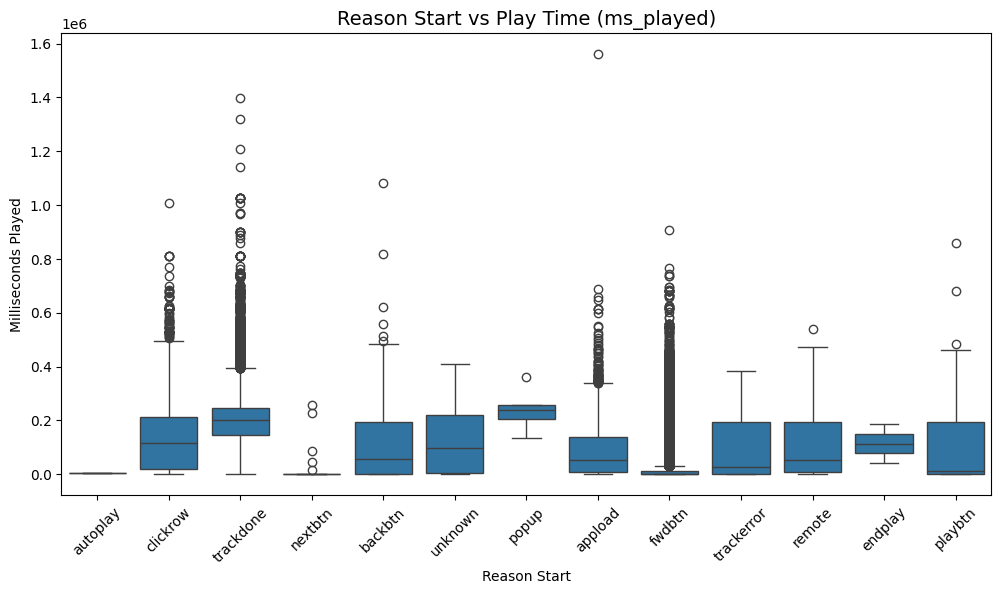

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='reason_start', y='ms_played', data=df)
plt.title('Reason Start vs Play Time (ms_played)', fontsize=14)
plt.xlabel('Reason Start')
plt.ylabel('Milliseconds Played')
plt.xticks(rotation=45)
plt.show()


# Preparing data for a model

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148463 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148463 non-null  object
 1   ts                 148463 non-null  object
 2   platform           148463 non-null  object
 3   ms_played          148463 non-null  int64 
 4   track_name         148463 non-null  object
 5   artist_name        148463 non-null  object
 6   album_name         148463 non-null  object
 7   reason_start       148463 non-null  object
 8   reason_end         148463 non-null  object
 9   shuffle            148463 non-null  bool  
 10  skipped            148463 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


In [22]:
df['ts'] = pd.to_datetime(df['ts'])

df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['day_of_week'] = df['ts'].dt.dayofweek
df['hour'] = df['ts'].dt.hour
df['minute'] = df['ts'].dt.minute
df['second'] = df['ts'].dt.second

df['ms_played_minutes'] = df['ms_played'] / 60000

df['time_of_day'] = np.where(df['hour'] < 12, 'Morning', 'Afternoon')

df['is_repeated_play'] = df.groupby('spotify_track_uri')['ts'].transform(
    lambda x: x.diff().dt.days.lt(30).any())

df['play_count'] = df.groupby('spotify_track_uri')['spotify_track_uri'].transform('count')

df['platform_count'] = df.groupby('platform')['platform'].transform('count')

df['shuffle_effect'] = df['shuffle'].astype(int)
df['skipped_effect'] = df['skipped'].astype(int)

df.drop(columns=['spotify_track_uri', 'ts', 'reason_start', 'reason_end'], inplace=True)

label_encoder = LabelEncoder()

df['platform'] = label_encoder.fit_transform(df['platform'])
df['artist_name'] = label_encoder.fit_transform(df['artist_name'])
df['track_name'] = label_encoder.fit_transform(df['track_name'])
df['album_name'] = label_encoder.fit_transform(df['album_name'])
df['time_of_day'] = label_encoder.fit_transform(df['time_of_day'])

df = df[['platform', 'artist_name', 'track_name', 'album_name', 'year', 'month', 'day', 'day_of_week', 'hour',
         'minute', 'second', 'time_of_day', 'ms_played_minutes', 'is_repeated_play', 'play_count', 'platform_count',
         'shuffle_effect', 'skipped_effect']]

In [23]:
X = df.drop(columns=['is_repeated_play'])
y = df['is_repeated_play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")


Training samples: 118770
Test samples: 29693


# Create model

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

Train Accuracy: 0.9982571356403133
Test Accuracy: 0.9895598289159061

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      2250
        True       0.99      1.00      0.99     27443

    accuracy                           0.99     29693
   macro avg       0.98      0.95      0.96     29693
weighted avg       0.99      0.99      0.99     29693

Confusion Matrix:
[[ 2022   228]
 [   82 27361]]


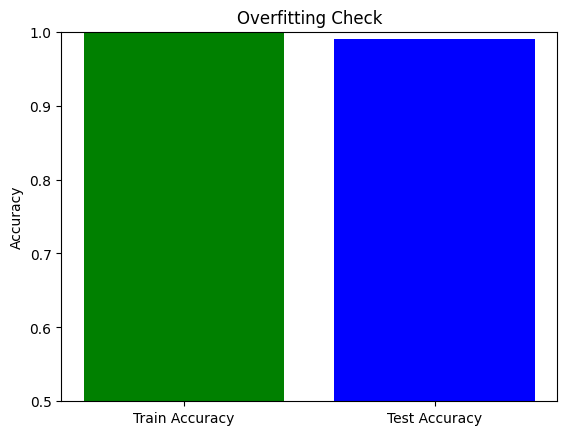

In [25]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['green', 'blue'])
plt.ylim(0.5, 1.0)
plt.title('Overfitting Check')
plt.ylabel('Accuracy')
plt.show()
